<h1> 분석 기법 - Vector space model </h1>
- 문서를 bag-of-model로 표현해 보자.
- 표현된 bag-of-model로 간단한 머신러닝 알고리즘을 적용해보자
- TF-IDF를 통해 중요한 단어를 추출해보자.

In [1]:
# kkma package

from konlpy.tag import Kkma
from konlpy.utils import pprint

news1 = """
중국이 관영매체를 통해 미국 공화당 대선후보인 도널드 트럼프가 떨어지는 지지도를 만회하기 위해 '중국 때리기 카드'를 쓰고 있다고 반박에 나섰다.
관영 신화통신은 9일 논평을 통해 트럼프의 선동적인 수사는 '미국 중서부 블루칼라 유권자에게 어필하려는 의도'라며 "위험하고 미·중 양국관계에 아무런 실질적 도움이 안 된다"고 주장했다.
트럼프 후보는 전날 미국 디트로이트에서 경제공약을 발표하면서 "중국이 미국과 교역에서 상상할 수 있는 모든 방법으로 기존의 룰을 깨고 있고 미국 재정적자의 절반가량은 중국의 책임"이라고 주장했다.
트럼프는 이어 중국이 불법적으로 수출 보조금을 지급하고 위안화 환율을 조작하고 있으며 지적재산권을 훔치고 있다고 비난을 퍼부었다.
그는 중국의 수출품을 차단하고 세계 무역규정을 재협상함으로써 미국경제를 부흥시켜야 한다며 "글로벌리즘이 아닌 아메리카니즘(Americanism)이 우리의 신조가 될 것"이라고 강조했다.
신화통신은 이에 대해 "트럼프와 그의 팀이 미국의 경제 부진에 대해 중국과 세계 자유무역을 희생양으로 삼음으로써 자유무역주의라는 공화당의 전통 정신을 위배하고 있다"고 반박했다.
그러면서 미국 정치인들의 '중국 때리기'는 미국 자체의 구조적 퇴보를 숨기려 노상 행해졌던 일이라고 지적했다. 신화통신은 이어 미국이 이런 문제를 해결하려면 뼈를 깎는 구조조정이 필요하다고 조언하기도 했다.
신화통신은 또 미국 상무부의 통계를 인용해 트럼프식 접근법으로는 미국 내 350만 개 일자리가 희생될 것이고 경제침체와 함께 미국 소비자들이 더 비싸게 물건을 사야 하는 결과를 초래할 뿐이라고 강조했다.
지난해 대미 무역수지 흑자만 3천700억 달러를 낸 중국은 트럼프 후보뿐 힐러리 클린턴 민주당 대선 후보도 보호무역 강화 기조의 선거공약을 내놓자 이들 후보의 공약이 대선 후 현실화될지에 촉각을 곤두세우고 있다.
AP통신은 이날 신화통신의 반박 논평 소식을 전하며 선거유세 기간 트럼프 후보의 중국에 대한 비판이 공산당 일당독재의 정치체제나 인권 남용에 대한 언급은 거의 없이 중국의 무역관행에만 초점을 맞추고 있다고 지적했다.
"""

# 명사만 추출해보자 - 
kkma = Kkma() # 꼬꼬마 인스턴스를 생성합니다.
news1_pos = kkma.pos(news1)
print(news1_pos)

[('중국', 'NNG'), ('이', 'JKS'), ('관영', 'NNG'), ('매체', 'NNG'), ('를', 'JKO'), ('통하', 'VV'), ('어', 'ECS'), ('미국', 'NNP'), ('공화당', 'NNG'), ('대선', 'NNG'), ('후보', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('도', 'NNG'), ('널드', 'UN'), ('트럼프', 'NNG'), ('가', 'JKS'), ('떨어지', 'VV'), ('는', 'ETD'), ('지지도', 'NNG'), ('를', 'JKO'), ('만회', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('위하', 'VV'), ('어', 'ECS'), ("'", 'SS'), ('중국', 'NNG'), ('때리', 'VV'), ('기', 'ETN'), ('카드', 'NNG'), ("'", 'SS'), ('를', 'JKO'), ('쓰', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('다고', 'EFN'), ('반', 'NNG'), ('박', 'NNG'), ('에', 'JKM'), ('나서', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('관영', 'NNG'), ('신화', 'NNG'), ('통신', 'NNG'), ('은', 'JX'), ('9', 'NR'), ('일', 'NNM'), ('논평', 'NNG'), ('을', 'JKO'), ('통하', 'VV'), ('어', 'ECS'), ('트럼프', 'NNG'), ('의', 'JKG'), ('선동적', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('수사', 'NNG'), ('는', 'JX'), ("'", 'SS'), ('미국', 'NNP'), ('중서부', 'NNG'), ('블루', 'NNG'), ('칼라', 'NNG'), ('유권자', 'NNG'), ('에게', 'JKM'), ('어필', 'NNG'), ('하', 

In [2]:
import nltk # 형태소 분석할 떄 데이터 탐색할 때 사용하면 편리
text = nltk.Text(news1_pos)

In [3]:
print(len(text.tokens))                 # returns number of tokens
print(len(set(text.tokens)))            # returns number of unique tokens

535
264


<h3> kkma package vs twitter package</h3>
- kkma의 경우 우리가 알고 있는 품사보다 형태소를 더 작은 단위로 분석 (연구용)
- 배경지식이 없다면 해석하기 힘듬
- 트위터 코리아에서 만든 새로운 형태소 분석 패키지 : twitter

In [4]:
# 대통령 취임사로 tf vector 만들어보기

president_address = open('대통령취임사.txt','r').read()
print(president_address)

존경하는 국민여러분! 700만 해외동포 여러분!
저는 오늘 대한민국의 제18대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 이 자리에 섰습니다.
저에게 이런 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며, 이 자리에 참석해주신 이명박 대통령과 전직 대통령, 그리고 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다. 저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복, 문화융성을 이뤄낼 것입니다.
부강하고, 국민 모두가 함께 행복한 대한민국을 만드는 데 저의 모든 것을 바치겠습니다.
국민여러분!
오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다. 하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 동시에 이룬 위대한 성취의 역사를 만들었습니다.
한강의 기적으로 불리는 우리의 역사는 독일의 광산에서, 열사의 중동 사막에서, 밤새 불이 꺼지지 않은 공장과 연구실에서, 그리고 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 우리 국민들이 계셔서 가능했습니다. 저는 오늘의 대한민국을 만드신 모든 우리 국민들께 진심으로 경의를 표합니다.


존경하는 국민 여러분!
격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 우리 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다.
글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다. 이번 도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다.
새로운 길을 개척하는 것은 쉽지 않은 일입니다. 그러나 저는 우리 대한민국의 국민을 믿습니다. 역동적인 우리 국민의 강인함과 저력을 믿습니다.
이제 자랑스런 우리 국민 여러분과 함께 희망의 새 시대, ‘제2의 한강의 기적’을 만드는 위대한 도전에 나서고자 합니다.
국민 개개인의 행복의 크기가 국력의 크기가 되고, 그 국력을 모든 국민이 함께 향유하는 희망의 새 시대를 열겠습니다.
존경하는 국민 여러분!
저는 오늘 국가발전과

In [5]:
# Twitter package
from konlpy.tag import Twitter
pos_tagger = Twitter()

# list comprehension, for loop가 빨라짐, 간결한 표현
pos_address = ['/'.join(t) for t in pos_tagger.pos(president_address)] # 형태소로 tokenizing // 동음이의어를 구분하기 좋음

#pos_news = ['/'.join(t) for t in pos_tagger.pos(news1) if t[1]=='Noun']

# list 원소 중 10개를 살펴보기
pprint(pos_address[:20])

['존경하는/Verb',
 '국민/Noun',
 '여러분/Noun',
 '!/Punctuation',
 '700/Number',
 '만/Noun',
 '해외동포/Noun',
 '여러분/Noun',
 '!/Punctuation',
 '저/Noun',
 '는/Josa',
 '오늘/Noun',
 '대한민국/Noun',
 '의/Josa',
 '제/Noun',
 '18/Number',
 '대/Verb',
 '대통령/Noun',
 '에/Josa',
 '취임/Noun']


In [6]:
# 형태소 분석과 전처리 과정만 끝난다면 nltk와 scikit learn을 예전과 동일한 방법으로 사용할 수 있습니다.

import nltk 


# Text() - 단일 문서에 대한 탐색에 좋은 함수가 내장
text = nltk.Text(pos_address) # 형태소 분석이 된 list를 input으로 넣어주면


print(len(text.tokens)) # 문서에서 나온 token 수
print(len(set(text.tokens))) # 겹치지 않는 token 개수
pprint(text.vocab().most_common(20)) # 가장 빈번히 나온 token 나열


2371
760
[('의/Josa', 98),
 ('을/Josa', 88),
 ('./Punctuation', 86),
 (',/Punctuation', 62),
 ('국민/Noun', 57),
 ('이/Josa', 51),
 ('를/Josa', 46),
 ('습니다/Eomi', 39),
 ('가/Josa', 39),
 ('다/Eomi', 36),
 ('과/Josa', 35),
 ('것/Noun', 33),
 ('입니/Adjective', 32),
 ('에/Josa', 30),
 ('수/Noun', 28),
 ('는/Josa', 27),
 ('우리/Noun', 23),
 ('시대/Noun', 22),
 ('여러분/Noun', 19),
 ('문화/Noun', 18)]


In [9]:
# 빈도 기준으로 token plot - distribution확인
text.plot(50)

# font 문제가 있다면 먼저 실행
from matplotlib import font_manager, rc
font_fname = r'C:\Windows\Fonts\HYWULM.TTF'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [8]:
# FreqDist 함수로도 같은 기능을 수행할 수 있다.
freq = nltk.FreqDist(text)
freq['것/Noun']
freq.most_common(10)
freq.plot(10)

<h3> TF-IDF 벡터 만들기</h3>
- TF 벡터와 TF-IDF 벡터는 scikit learn(http://scikit-learn.org/)을 통해 계산할 수 있다.

In [10]:
# 한글 bag-of-words 만들어보자
from konlpy.tag import Twitter
import pandas as pd

# 연합뉴스 로딩
kor_corpus = pd.read_csv(r'한류_연합뉴스.csv', encoding='cp949')

# 뉴스기사 정제

pos_tagger = Twitter()
#pos_address = ['/'.join(t) for t in pos_tagger.pos(news) if t[1]=='Noun' for news in kor_corpus['contents']] # 형태소로 tokenizing // 동음이의어를 구분하기 좋음


# list 원소 중 10개를 살펴보기
#pprint(pos_address[:10])
total_news = []

# 한글 문서 명사만 뽑아서 tf-idf
stopword = ['것','수','저']
for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))


In [11]:
kor_corpus.head()

,time,title,contents
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(total_news) # 딕셔너리에 실제 단어들을 입력


In [22]:
print(kor_bow)

  (0, 29)	4
  (0, 204)	1
  (0, 199)	1
  (0, 53)	1
  (0, 61)	1
  (0, 333)	1
  (0, 105)	2
  (0, 132)	3
  (0, 196)	6
  (0, 173)	5
  (0, 4)	1
  (0, 282)	4
  (0, 194)	3
  (0, 68)	1
  (0, 66)	3
  (0, 262)	1
  (0, 52)	1
  (0, 348)	3
  (0, 48)	2
  (0, 6)	1
  (0, 175)	1
  (0, 271)	1
  (0, 123)	2
  (0, 226)	1
  (0, 301)	1
  :	:
  (4, 181)	1
  (4, 260)	1
  (4, 30)	1
  (4, 176)	1
  (4, 38)	1
  (4, 193)	1
  (4, 202)	2
  (4, 190)	2
  (4, 133)	1
  (4, 45)	1
  (4, 247)	1
  (4, 249)	1
  (4, 272)	1
  (4, 75)	1
  (4, 305)	1
  (4, 267)	1
  (4, 59)	1
  (4, 306)	1
  (4, 15)	1
  (4, 85)	1
  (4, 22)	1
  (4, 259)	1
  (4, 106)	1
  (4, 77)	1
  (4, 349)	1


In [13]:
print(kor_vectorizer.get_feature_names())
# bag-of-words
print(kor_bow.shape)
print(kor_bow.toarray())

['가수', '가요', '각각', '개정', '개척', '거점', '건강', '검진', '견실', '견지해', '결정', '경북', '경연', '경우', '경운대', '경쟁', '경제', '경향', '계획', '고고', '고신대', '공간', '공공', '공연장', '공유', '과거', '관계자', '관련', '광부', '광주', '교류', '교육', '교육감', '구미', '구미시장', '구축', '국내', '국립병원', '국민', '국악', '국제', '권정열', '규모', '그룹', '극장', '극히', '근무', '금은', '기기', '기도', '기사', '기술', '기업', '기자', '기존', '기타', '기획', '김영만', '김태우', '끼리', '나라', '날로', '내년', '내달', '내용', '노래', '노아', '누구', '눈길', '능이', '다음', '다이어트', '단일', '당일', '대구', '대부분', '대상', '대중', '대표', '대학', '대한', '대해', '댄스', '더욱', '도시', '도움', '도지사', '독소', '동상', '드림', '등록', '디자이너', '디자인', '라며', '라피', '리밍', '만원', '메시지', '몽골', '문의', '문전', '문화', '물리', '미래', '미사일', '미용', '민간', '박대', '박순', '박창수', '반복', '반응', '발굴', '발급', '발생', '발전', '방어', '배너', '배치', '번역', '베트남', '병원', '보도', '보유', '복부', '복음병원', '본문', '본선', '봉사', '부문', '부분', '부산', '분야', '분위기', '분해', '브랜드', '브리핑', '사드', '사립', '사무국', '사업', '사흘', '산업', '상의', '상표', '생각', '생산', '생소', '서로', '서울', '석션기', '선도', '선발', '설명', '성공', '성분', '성인', '세계', '세라믹', '세종', '센터', '

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())

In [15]:
tfidf.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.06236855,
         0.        ,  0.06236855],
       [ 0.07572825,  0.1514565 ,  0.06109707, ...,  0.        ,
         0.07572825,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.05084439, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
# 간단한 예제

ex_text = ["한국 김치 ",
          "한국 미국 FTA FTA ",
          "한국 미국 "]

kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(ex_text)

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())
print(kor_vectorizer.get_feature_names())
print(kor_bow.toarray())
print(tfidf.toarray())


['fta', '김치', '미국', '한국']
[[0 1 0 1]
 [2 0 1 1]
 [0 0 1 1]]
[[ 0.          0.861037    0.          0.50854232]
 [ 0.90100815  0.          0.34261996  0.26607496]
 [ 0.          0.          0.78980693  0.61335554]]


<h3> 워드 클라우드 TF  v.s. TF IDF</h3>

In [17]:
# pip install wordcloud
from wordcloud import WordCloud

In [18]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Daum_SemiBold.ttf')

In [19]:
yonhap = pd.read_csv("한류_연합뉴스.csv", encoding = 'cp949')['contents']

In [20]:
# 200개만 사용하겠습니다 왜냐 느리니깐 ㅎㅎ
kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(yonhap[:200])
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [21]:
yonhap[20]

'(부산=연합뉴스) 김상현 기자 = 아시아 대중음악 축제인 아시아송페스티벌이 10월 7일부터 9일까지 부산아시아드 경기장에서 열린다. 부산시는 10월 7일과 8일 부산아시아드 보조경기장에서 2016 아시아송페스티벌 전야행사를 하고, 10월 9일 부산아시아드 주경기장에서 본행사를 한다고 밝혔다. 2014년부터 시작한 아시아송페스티벌은 대중음악을 매개체로 아시아의 화합과 문화교류 활성화를 도모한다. 전체기사 본문배너 올해 축제는 대한민국을 대표하는 K팝 아티스트와 중국, 일본, 베트남, 싱가포르, 인도네시아, 필리핀 등 아시아 주요 국가들의 최정상급 아티스트가 대거 출연한다. 10월 9일 열리는 본행사에는 엑소, NCT 127, 세븐틴, 트와이스, AOMG 사이먼 도미닉 등이 참여를 확정해 아시아 한류팬들의 관심을 불러일으킬 것으로 기대된다. 행사를 주최하는 한국음악콘텐츠산업협회 최광호 사무국장은 "아시아송페스티벌 한국 대표를 선발하기 위해 공인 음악차트인 \'가온차트\'의 음원, 음반 판매량, 각종 SNS 등을 참고했다"며 "올해 행사에 출연하는 한국 대표는 각 부문 2016년 상반기 최고 가수라고 해도 과언이 아니다"라고 말했다. 해외 가수의 경우 해외 유명 레이블과 세계적인 음반사 등에서 신청한 가수 가운데 20여 명의 아티스트를 1차 후보군에 올려 최종 선발작업을 벌이고 있다. 올해 아시아송페스티벌은 부산시와 한국음악콘텐츠산업협회가 공동 주최하고 문화체육관광부가 후원한다. 엠넷에서 TV로 방영한다.'

In [22]:
# wordcloud 용 데이터 형태로 변환
word_tf = zip(kor_vectorizer.get_feature_names(),kor_bow.toarray()[20])

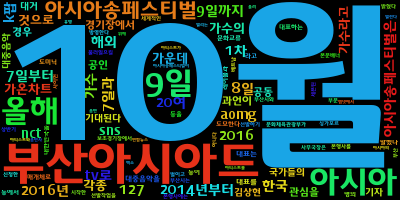

In [23]:
wordcloud.generate_from_frequencies(word_tf).to_image()

In [24]:
word_tfidf = zip(kor_vectorizer.get_feature_names(),tfidf.toarray()[20])

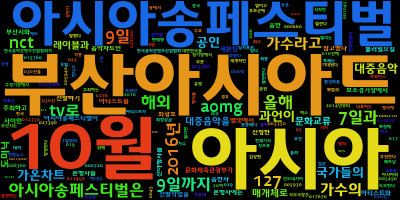

In [25]:
wordcloud.generate_from_frequencies(word_tfidf).to_image()

<h3> 연어(collocation) 예제</h3>

In [26]:
from konlpy.corpus import kolaw
from konlpy.utils import pprint
from nltk import collocations
from konlpy.tag import Kkma

measures = collocations.BigramAssocMeasures()
#doc = kolaw.open('constitution.txt').read()
doc = open('대통령취임사.txt','r').read()
print('\nCollocations among tagged words:')

tagged_words = Kkma().pos(doc)
finder = collocations.BigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI

print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.BigramCollocationFinder.from_words(words)

finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))

print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.BigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tagged words:
[(('21', 'NR'), ('세기', 'NNG')),
 (('5', 'NR'), ('천', 'NR')),
 (('·', 'SP'), ('무형', 'NNG')),
 (('각종', 'NNG'), ('불공정', 'NNG')),
 (('경축', 'NNG'), ('사절', 'NNG')),
 (('계와', 'MAG'), ('품앗이', 'NNG')),
 (('그리고', 'MAG'), ('이러하', 'VA')),
 (('근심', 'NNG'), ('없이', 'MAG')),
 (('글로', 'MAG'), ('벌', 'VV')),
 (('남북', 'NNG'), ('간', 'NNB'))]

Collocations among words:
[('과학', '기술'),
 ('문화', '융성'),
 ('경제', '부흥'),
 ('창조', '경제'),
 ('국가', '발전'),
 ('바라', 'ㅂ니다'),
 ('국민', '여러분'),
 ('국민', '여러'),
 ('행복', '시대'),
 ('우리', '대한민국')]

Collocations among tags:
[('XR', 'XSA'), ('NR', 'NNM'), ('JC', 'OL'), ('MAC', 'SS'), ('VXV', 'EPH')]


In [27]:
measures = collocations.TrigramAssocMeasures()
#doc = kolaw.open('constitution.txt').read()
doc = open('대통령취임사.txt','r').read()
print('\nCollocations among tagged words:')

tagged_words = Kkma().pos(doc)
finder = collocations.TrigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI

print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.TrigramCollocationFinder.from_words(words)

finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))

print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.TrigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tagged words:
[(('5', 'NR'), ('천', 'NR'), ('년', 'NNB')),
 (('년', 'NNB'), ('유', 'NNG'), ('·', 'SP')),
 (('드립', 'NNG'), ('니', 'VV'), ('다', 'ECS')),
 (('밤새', 'NNG'), ('불이', 'NNG'), ('꺼지', 'VV')),
 (('부탁', 'NNG'), ('드립', 'NNG'), ('니', 'VV')),
 (('여성', 'NNG'), ('이나', 'JC'), ('장애인', 'NNG')),
 (('영하', 'NNG'), ('수십', 'NR'), ('도', 'NNM')),
 (('유', 'NNG'), ('·', 'SP'), ('무형', 'NNG')),
 (('이나', 'JC'), ('장애인', 'NNG'), ('또는', 'MAG')),
 (('이상', 'NNG'), ('핵과', 'NNG'), ('미사일', 'NNG'))]

Collocations among words:
[('국민', '행복', '시대')]

Collocations among tags:
[('VXV', 'EPH', 'ETN'),
 ('XR', 'XSA', 'ETN'),
 ('SP', 'MAC', 'SS'),
 ('SS', 'SP', 'MAC'),
 ('ECS', 'VXV', 'EPH')]


<h3> 문서 비교 </h3>
- 각각의 문서를 bag-of-words를 이용해 수치형 벡터로 표현
- 문서끼리 얼마나 가까운지 similarity를 계산하여 비교해보자

In [28]:
nltk.Text(pos_news).concordance('김영만', width=50, lines=5)
nltk.Text(pos_news).dispersion_plot(['한국','미사일'])

Displaying 1 of 1 matches:
                       김영만 기자 한국 고고 미사일 방어 체계 사드 


In [96]:
print(pos_news)

['세종', '연합뉴스', '김영만', '기자', '한국', '고고', '미사일', '방어', '체계', '사드', '배치', '결정', '이후', '중국', '내', '한류', '위축', '우려', '대해', '문화', '체육관', '광부', '윤태용', '문화', '콘텐츠', '산업', '실장', '일', '중국', '우리', '우리나라', '문화', '콘텐츠', '더욱', '중국', '고', '윤', '실장', '날', '연합뉴스', '인터뷰', '중국', '한류', '진출', '및', '성공', '여부', '문화', '외적인', '요소', '콘텐츠', '생산', '유통', '며', '그', '한국', '창의성', '기술', '중국', '자본', '시장', '각각', '장점', '중이', '서로', '협력', '윈윈할', '라며', '한국', '우리', '항상', '중국', '협력', '중', '시한', '메시지', '중국', '측', '게', '고', '전체', '기사', '본문', '배너', '두', '나라', '외부', '요인', '약간', '오해', '잠깐', '문화', '경제', '측면', '안목', '미래', '지향', '시각', '견지해', '한국', '중국', '언론', '중국', '한류', '제동', '관련', '보도', '반복', '재생산', '대해', '그', '실제', '과', '측면', '적지', '중', '문화', '예술', '교류', '신뢰', '국민', '업계', '우려', '고', '그', '또', '최근', '사드', '여파', '양국', '분위기', '속', '극히', '일부', '한류', '행사', '일정', '조금', '대부분', '취소', '정상', '알', '며', '며', '국내', '언론', '끼리', '한국', '중국', '언론', '식', '취재', '경쟁', '건', '양국', '발전', '도움', '안', '고', '윤', '실장', '문화', '예술', '분야', '공공', '부문', '선도', '중국

In [143]:
yonhap

0       (광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1       (구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2       (부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3        (대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4       (세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...
5       (서울=연합뉴스) 구정모 기자 = 사드(THAAD·고고도 미사일 방어체계) 배치 결...
6       (서울=연합뉴스) 배영경 현혜란 기자 = 새누리당이 사드(THAAD·고고도미사일방어...
7       (서울=연합뉴스) 고은지 기자 = 코트라(KOTRA)는 9일 서울 서초구 사옥에서 ...
8       (서울=연합뉴스) 윤고은 기자 = 한류스타 장근석의 팬클럽이 지난 6~7일 '장근석...
9       (서울=연합뉴스) 윤고은 기자 = 한류스타 이광수가 패션 브랜드 버커루의 광고모델로...
10      (서울=연합뉴스) 구정모 기자 = 사드(THAAD·고고도 미사일 방어체계) 배치 결...
11      (서울=연합뉴스) 김태균 기자 = 과잉 규제인가, 남북분단 상황에서 어쩔 수 없는 ...
12      (서울=연합뉴스) 이대희 기자 = 인천공항에 K팝 스타와 클래식 아티스트가 모인 무...
13      (베이징=연합뉴스) 심재훈 특파원 = 중국이 한반도 사드(고고도미사일방어체계) 배치...
14      (서울=연합뉴스) 고동욱 기자 = 산업은행은 6월 29일부터 6주간 중앙아시아 동포...
15      (서울=연합뉴스) 조민정 기자 = 한국의 고고도 미사일방어체계(사드·THAAD) 배...
16      (세종=연합뉴스) 김영만 기자 = 한국콘텐츠진흥원이 국내 만화·웹툰업계의 해외진출을...
17      (서울=연합

<h3> 유사 문서 검색 </h3>

In [ ]:
import re

total_news = []
stopword = ['것','수','저']

for news in yonhap[:1000]:
    pos_news = re.sub('.* 기자 = ', '', news) # 한 기자가 많은 기사를 작성. 기자명 때문에 유사한 것으로 계산될 수 있으니 이를 제거하자
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(pos_news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [ ]:
kor_vectorizer = CountVectorizer(min_df=10)
kor_bow = kor_vectorizer.fit_transform(total_news)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(kor_bow[0], kor_bow)

In [43]:
idx = (-cosine_similarity(kor_bow[0], kor_bow)[0]).argsort()
print(idx)

[  0 604  21 503 883 172 498 196 440 416 552 877 895 685 393 264  69 740
 309 671 222 287 723 770  71 917  91 187 737 272 628 463 680 733 487 594
 768 765 232 369 349 243 800 553 267 305 271 427 506 525 665 933  17 712
 891 261 417 806 964  97 587 849 970 471 160 203 280 676 682 753 497 850
 747 585 551 642 228 386 161 268 363 283 558 785 661 713  57 675 457 629
 154 382 906 554 511 320 719 184 687 175 492 724 876 926 273 201 826 882
 958 759 938 957 355  45 360 752 426 389 582 242 677 911  18 147 617 218
 567 379 973 887 447 255 337 931   7 951 405 584 215 784 779 269 491 997
 475 916 907 708 634 884 178 881 202 144 496 683 641 177 181 515 942 560
 460 306 352 912 129 343 871 855  67 472  85 946 376 944 104  99 354   4
 975 913 489 788 109 532 346 798 149 864 189 711 336 643 152 134 115 890
 994 456 857 230 125 302 490 290 928 274 823 974 420 561 356 845 778 763
 289 648 969 399 388 128 136  94  74 971 419 742 236 624 610 167  40 213
 725 477 185 614 512 573 529 378 135 480  16  89  3

In [ ]:
# idx에서 자기 자신을 뺀 두번째 index 즉 idx[1] 리턴! // 이전까지는 intuition
def find_most_similar_news(index, bow, corpus):
    idx = (-cosine_similarity(bow[index], bow)[0]).argsort()[1]
    return corpus[idx]

In [ ]:
# 이제부터 시작!
idx = 300

In [46]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [47]:
find_most_similar_news(idx, kor_bow, yonhap) # Query를 제외하고 가장 유사한 문서, 북한이라는 키워드는 없다

'(서울=연합뉴스) 조민정 기자 = "준, 앞을 봐야 하지 않아?" 운전하면서도 조수석에 앉은 자신을 쳐다보며 이야기를 이어가는 남자 주인공에게 타박이 날아든다. 박준이라는 이름의 이 남자 주인공은 재벌 2세. 회사를 물려받는 대신 레스토랑을 연 셰프다. 레스토랑의 여자 매니저는 그와 그의 재산을 탐내며 곁을 맴돌고 부주방장 서연은 그를 짝사랑한다. 전체기사 본문배너 한국 드라마에 빠진 한 백인 소녀가 가상의 세계 \'드라마월드\'에 떨어지면서 벌어지는 이야기를 담은 이 드라마는 곳곳에 한국 드라마의 전형적인 설정들을 재치있게 엮어냈다. 지난 1일부터 한국에서도 볼 수 있게 된 이 미국 드라마에서 \'김치싸대기\', 삼겹살과 소주, 욕심 많은 사모님, 노골적인 간접광고(PPL)까지 익숙한 장면들을 찾아보는 재미가 쏠쏠하다. ◇ "저 자동차 로고는 왜 가린 거야?" 주인공 박준(션 리처드 분)이 화가 났다는 것은 그가 상의 탈의를 하고 샤워기 아래서 뜨거운 물을 맞는 장면으로 드러나고, 차를 타고 가다가 화가 났을 땐 길 한가운데서 상대방에게 낮고 굵은 목소리로 "내려. 내리라고"라 한다. 준의 어머니는 아들이 회사를 이었으면 하는 바람으로 사사건건 간섭을 한다. 그런 그녀 옆에는 \'예비 며느리\'를 자처하는 여자가 있는데, 물론 악녀다. 여주인공 서연(배누리)은 설거지 담당부터 시작해 뛰어난 실력과 미모로 준의 마음을 사로잡아 그를 바로 옆에서 보조하게 됐다. 순수하고 남자를 일부러 꼬시는 일 따위는 할 줄 모른다. 준의 아버지가 운영하던 회사인 \'서리꽃\'의 제품들은 시도 때도 없이 등장해 클로즈업되는 반면, 준이 탄 자동차의 로고는 가려져 있다. 한국 드라마에 과도하게 등장하는 간접광고(PPL)에 대한 패러디다. 급기야 아침 드라마에서 등장해 한동안 화제가 됐던 \'김치 싸대기\' 장면도 \'깨알같이\' 패러디됐다. 누구나 \'뻔하다\'고 생각할만한 설정들을 보란 듯이 노골적으로 드러내 한국 드라마를 단 몇 번이라도 본 사람이라면 피식피식 웃음이 새어 

<h4> TF IDF weighting을 사용하면 더 정확하게 유사한 문서를 찾을 수 있다 </h4>

In [48]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [51]:
def find_most_similar_news_idf(index, tfidf, corpus):
    idx = (-cosine_similarity(tfidf[index], tfidf)[0]).argsort()[1]
    return corpus[idx]

In [52]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [53]:
# 가운데 일치하는 내용이 있다!!!!!!!! 좋은 예시입니다.
find_most_similar_news_idf(idx, tfidf, yonhap)

'(하노이=연합뉴스) 김문성 특파원 = 배정호 민주평화통일자문회의 사무처장은 27일 "북한의 전통적인 우방국이자 여전히 정치, 경제, 군사적 교류를 이어가는 베트남의 대북제재 이행은 북한의 태도변화에 큰 전환점이 될 수 있다"며 베트남의 적극적인 제재 동참을 촉구했다. 배 사무처장은 이날 베트남 하노이 롯데호텔에서 민주평통 주최로 열린 \'2016 한·베트남 평화통일포럼\'에서 기조연설을 통해 "유엔 제재가 빈틈없이 이행되도록 한국과 베트남이 적극적으로 협력하는 것이 무엇보다 필요하다"고 강조했다. 그는 "2014년 북한과 베트남이 500만 달러(57억 원)의 투자와 교역을 진행했고 베트남에 북한 식당도 운영되고 있다"며 북한의 돈줄을 죄고 비핵화를 이루는데 베트남의 협력을 요청했다. 전체기사 본문배너 강동완 동아대 교수는 \'한류가 북한사회에 미치는 영향\'이란 주제 발표에서 "최근 북한 내부에서 남한 영화나 드라마가 인기를 누리면서 한류 현상이 확산하고 있다"며 "이는 단순히 한류 전파라는 점 이외에 폐쇄된 북한 체제에 자본주의 요소인 시장을 확대하는 매개체"라고 평가했다. 강 교수는 "시장이 단순히 물물거래의 기능보다는 정보가 유통되고 북한사회의 폐쇄성을 상쇄하는 기능을 지니게 됐다"며 "남한 영상 매체의 확산은 북한에서 지역·계층 간 경계 허물기라는 사회적 현상의 변화를 초래하고 있다"고 말했다. 강 교수는 북한 주민의 남한 영상 매체 시청이 북한 체제 변화를 촉구하는 다른 요인과 상호 결합할 경우 북한사회 전체를 움직일 수 있을 기폭제가 될 것으로 전망했다. 딘 꽝 하이 베트남 역사연구소장은 베트남이 1975년 남북통일 이후 중앙에서 지방까지 집중적이고 일관된 정치, 문화, 사회, 경제 통합을 추진했다고 소개하며 전쟁 상흔 치료, 민족 화합과 화해, 미래를 위해 승자와 패자라는 이분법식 인식과 과거 상처에 얽매여서는 안 된다고 지적했다.'

</h4> TF IDF scheme을 활용하여, 유사한 문서끼리 묶어보자 </h4>

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters = 5)

In [56]:
kmeans.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
kmeans.labels_

array([3, 2, 2, 2, 4, 4, 4, 3, 1, 1, 4, 2, 2, 4, 2, 4, 3, 3, 3, 1, 2, 3, 2,
       4, 4, 4, 4, 4, 4, 3, 0, 4, 2, 0, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 2, 3, 4, 2, 4, 4, 2, 3,
       2, 2, 3, 0, 2, 3, 2, 4, 2, 4, 3, 1, 4, 3, 2, 2, 4, 2, 2, 2, 4, 1, 4,
       3, 4, 4, 2, 4, 2, 1, 3, 2, 1, 3, 0, 3, 3, 2, 2, 0, 3, 2, 2, 2, 3, 1,
       2, 2, 3, 3, 2, 2, 3, 2, 1, 0, 2, 2, 2, 0, 3, 3, 3, 2, 1, 2, 2, 2, 3,
       2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 3, 1, 1, 3, 0, 2,
       2, 1, 2, 3, 1, 3, 2, 1, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 1, 1,
       2, 3, 1, 2, 3, 2, 3, 2, 3, 0, 3, 2, 0, 2, 1, 3, 1, 1, 2, 3, 3, 3, 2,
       3, 2, 3, 0, 3, 0, 1, 4, 1, 2, 1, 2, 3, 4, 0, 1, 1, 2, 2, 2, 2, 2, 4,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 1, 1, 0, 2, 1, 2, 3, 1, 2, 2, 3, 3, 3, 3, 0, 2, 2, 1, 1, 2, 2, 1,
       2, 1,

In [59]:
import numpy as np
clusters = []
for i in range(0, kmeans.n_clusters):
    clusters.append(np.where(kmeans.labels_ == i))

In [60]:
clusters

[(array([ 30,  33,  95, 126, 131, 147, 151, 182, 216, 219, 233, 235, 244,
         279, 291, 305, 306, 308, 310, 325, 336, 338, 379, 386, 398, 403,
         436, 439, 469, 470, 480, 510, 519, 585, 601, 619, 645, 650, 653,
         658, 675, 676, 690, 692, 698, 699, 706, 714, 724, 744, 763, 764,
         776, 779, 782, 784, 787, 792, 794, 795, 804, 809, 811, 820, 824,
         827, 832, 837, 839, 843, 844, 846, 847, 848, 849, 850, 861, 862,
         864, 867, 868, 878, 885, 892, 900, 919, 930, 944, 948, 949, 954,
         955, 957, 966, 971, 975, 979, 993, 994, 996, 997], dtype=int64),),
 (array([  8,   9,  19,  83, 103, 113, 121, 124, 137, 146, 156, 164, 165,
         168, 170, 174, 179, 180, 185, 188, 191, 194, 205, 206, 209, 221,
         223, 224, 236, 238, 240, 245, 246, 263, 277, 278, 281, 284, 294,
         295, 298, 300, 301, 304, 312, 313, 314, 316, 317, 328, 339, 340,
         353, 358, 367, 370, 372, 373, 377, 385, 387, 395, 400, 423, 424,
         442, 449, 450, 451, 454, 45

In [61]:
# 클러스터 몇 개를 살펴보자
print('1번 클러스터')
print(yonhap[9])
print(yonhap[19])
print(yonhap[783])

1번 클러스터
(서울=연합뉴스) 윤고은 기자 = 한류스타 이광수가 패션 브랜드 버커루의 광고모델로 발탁됐다고 소속사 킹콩엔터테인먼트가 9일 밝혔다. 버커루 측은 "아시아 전역에서 인기 있는 이광수가 버커루와 긍정적인 효과를 끌어낼 수 있을 것이라 여겼다"고 설명했다. 이어 "앞으로 이광수와 함께하는 다양한 프로모션으로 소비자들과 만날 예정"이라고 덧붙였다. 전체기사 본문배너 이광수는 KBS 2TV '마음의 소리'와 tvN '안투라지' 방송을 앞두고 있다.
(서울=연합뉴스) 정아란 기자 = 한류스타 박해진(33)이 데뷔 10년 만에 처음 만들어지는 공식 팬클럽 창단식을 사비로 진행할 계획이다. 소속사 마운틴 무브먼트는 8일 "박해진이 팬들을 사랑하는 마음에서 2천여 명이 참석하는 공식 팬클럽 '클럽진스'(CLUB Jin's) 창단식 비용 전액을 자신이 부담하기로 했다"고 알렸다. 박해진은 지난 4월 데뷔 10주년 기념 팬미팅도 무료로 진행한 바 있다. 전체기사 본문배너 '클럽진스' 창단식은 오는 9월 25일 서울 연세대 대강당에서 '팬들을 박해진의 집으로 초대합니다'는 제목으로 진행된다. 이 행사에는 한국뿐 아니라 중국, 일본, 인도네시아, 터키, 이란, 영국, 노르웨이, 멕시코, 오스트레일리아 등 27개국 팬들이 참석한다.
(서울=연합뉴스) 윤고은 기자 = 한류스타 박해진이 제이준 코스메틱의 광고모델이 됐다고 소속사 마운틴무브먼트가 7일 밝혔다. 제이준 코스메틱은 "박해진의 세련되고 깨끗한 이미지가 제품과 잘 맞아 모델로 발탁하게 됐다"며 "한국을 넘어 아시아 전역 팬들에게까지 사랑받는 박해진과의 협업 활동을 기대해달라"고 밝혔다. 박해진은 이날 오후 4시30분 명동 제이준 직영점에서 팬사인회를 진행한다. 전체기사 본문배너 한편, 박해진은 오는 28일 중국 베이징을 시작으로, 대만과 태국에서 잇따라 팬미팅을 연다. 


<h4> > 한류스타 관련 클러스터라 할 수 있다 </h4>

In [62]:
print('2번 클러스터')
print(yonhap[4])
print(yonhap[5])
print(yonhap[991])

2번 클러스터
(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) 배치 결정 이후 중국 내 한류 위축 우려에 대해 문화체육관광부의 윤태용 문화콘텐츠산업실장은 9일 "중국이 우리에게 섭섭하게 하면 할 수 있도록 우리나라는 좋은 문화콘텐츠를 갖고 더욱 중국에 다가가야 한다"고 밝혔다. 윤 실장은 이날 연합뉴스와의 인터뷰에서 "중국에의 한류 진출 및 성공 여부는 문화 외적인 요소가 아닌 좋은 콘텐츠의 생산과 유통에 달려 있다"며 이같이 말했다. 그는 "한국의 창의성과 기술력, 중국의 자본과 시장이란 각각의 장점을 살려 한·중이 서로 협력하면 윈윈할 수 있을 것"이라며 "한국으로선 '우리는 항상 중국과 협력을 중시한다'는 메시지를 중국 측에 심어주는 게 중요하다"고 강조했다. 전체기사 본문배너 그러면서 "두 나라는 외부 요인으로 약간의 오해와 잠깐의 불편함이 발생하더라도 문화 경제적인 측면에서 긴 안목을 갖고 미래지향적인 시각을 견지해야 할 것"이라고 강조했다. 한국과 중국 언론에 '중국의 한류 제동' 관련 보도가 반복 재생산되는 것에 대해 그는 "실제보다 과한 측면이 적지않아 한·중의 문화예술 교류 신뢰가 깨지는 것처럼 비쳐 많은 국민과 업계가 우려하고 있다"고 지적했다. 그는 또 "최근 사드 여파로 양국간 서먹한 분위기 속에서 극히 일부 한류 행사 일정이 조금 미뤄질 수는 있겠지만, 대부분 취소되지 않고 정상적으로 진행되는 것으로 알고 있다"며 "며 "국내 언론끼리 또는 한국과 중국 언론이 '주고받기식'으로 취재 경쟁을 벌이는 건 양국 발전에 아무런 도움이 안 된다"고 덧붙였다. 아울러 윤 실장은 "문화예술 분야의 공공 부문이 선도적으로 나서 중국 측과 적극적으로 협력함으로써 사드 여파로 위축된 민간 부문의 대중(對中) 한류 활성화를 돕는 것도 필요하다"고 말했다.
(서울=연합뉴스) 구정모 기자 = 사드(THAAD·고고도 미사일 방어체계) 배치 결정 이후 중국이 한류 확산에 제동을 걸고 나선 것이 아니냐는 우려가 이는 가운데 아직 영

<h4> > 중국 관련 이슈 </h4>

<h4> 클러스터 개수를 줄이면 어떻게 될까? 반대로 늘리면?</h4>

In [63]:
# 클러스터 갯수를 조금 더 늘려보고 줄여봐서 어떻게 모이는지 확인해 보자!

In [ ]:
import gensim


#아래 명령어 실행하시고
def hash32(value):
     return hash(value) & 0xffffffff
    
doc_list = []
for doc in yonhap[:1000]:
    tokens = [t for t in pos_tagger.nouns(doc) if len(t)>1]
    doc_list.append(tokens)


[['광주', '연합뉴스', '여운', '기자', '날로', '피부', '미용', '분야', '에스테', '시장', '개척', '광주', '지역', '업체', '눈길', '노아', '전문', '에스테', '기업', '에스테', '화장품', '미용', '기기', '건강', '기기', '식품', '제품군', '보유', '원액', '추물', '캐비어', '앰플', '태반', '앰플', '셀룰라이트', '오일', '카페인', '성분', '함유', '다이어트', '리밍', '크림', '호응', '전체', '기사', '본문', '배너', '노아', '화장품', '회사', '근무', '이한수', '대표', '프랑스', '화장품', '단일', '브랜드', '취급', '사업', '초기', '문전', '박대', '투자', '실패', '현재', '제품', '브랜드', '직접', '제조', '유통', '자산', '규모', '억원', '연매출', '억원', '견실', '중소기업', '광주', '전남', '지역', '생소', '에스테', '분야', '현재', '여종', '관련', '분야', '특허', '의장', '등록', '상표', '등록', '보유', '지역', '업체', '선도', '라피', '열석', '시장', '반응', '업체', '설명', '전통', '온돌방', '착안', '라피', '신체', '물리', '순환', '시스템', '복부', '지방', '분해', '독소', '효과', '열석', '기도', '세라믹', '코팅', '접목', '기존', '일반', '석션기', '음이온', '발생', '원적외선', '열기', '능이', '노아', '지역', '대학', '협의', '다음', '신제품', '출시', '기존', '제품', '중국', '시장', '계획', '이한수', '대표', '광주', '상의', '제품', '브리핑', '국내', '에스테', '시장', '세계', '시장', '영역', '에스테', '한류', '문화']]
[['광주', '연합뉴스', '여운', '기자', '날로

In [91]:
import time
min_count = 1 #2 번 이하로 나온 단어는 무시하겠다
hidden_size = 50 #corpus 가 적을때는 50, 30 정도만 해도 충분하다, 많으면 100~200
workers = 1 #core 수
window= 3 #corpus가 작으면 window size가 적은게 좋고, 많으면 5~10으로 해도 됨
epoch = 30  #30~50정도

start = time.time()
model_total = gensim.models.Word2Vec(doc_list, window = window, min_count=min_count, size = hidden_size, workers = workers, iter = epoch, seed=1, hashfxn=hash32)

end = time.time()
print(end-start)

0.05705595016479492


In [92]:
model_total.most_similar('중국')

[('한국', 0.9460448622703552),
 ('영화', 0.9424800872802734),
 ('한류', 0.9418233036994934),
 ('문화', 0.9355810880661011),
 ('사드', 0.9335864782333374),
 ('사진전', 0.9302797913551331),
 ('쇼박스', 0.9263796210289001),
 ('연합뉴스', 0.9249894618988037),
 ('민주', 0.9228754043579102),
 ('경북', 0.9218058586120605)]

In [88]:
model_total.

0.001

In [89]:
doc_list

['광주',
 '연합뉴스',
 '여운',
 '기자',
 '날로',
 '피부',
 '미용',
 '분야',
 '에스테',
 '시장',
 '개척',
 '광주',
 '지역',
 '업체',
 '눈길',
 '노아',
 '전문',
 '에스테',
 '기업',
 '에스테',
 '화장품',
 '미용',
 '기기',
 '건강',
 '기기',
 '식품',
 '제품군',
 '보유',
 '원액',
 '추물',
 '캐비어',
 '앰플',
 '태반',
 '앰플',
 '셀룰라이트',
 '오일',
 '카페인',
 '성분',
 '함유',
 '다이어트',
 '리밍',
 '크림',
 '호응',
 '전체',
 '기사',
 '본문',
 '배너',
 '노아',
 '화장품',
 '회사',
 '근무',
 '이한수',
 '대표',
 '프랑스',
 '화장품',
 '단일',
 '브랜드',
 '취급',
 '사업',
 '초기',
 '문전',
 '박대',
 '투자',
 '실패',
 '현재',
 '제품',
 '브랜드',
 '직접',
 '제조',
 '유통',
 '자산',
 '규모',
 '억원',
 '연매출',
 '억원',
 '견실',
 '중소기업',
 '광주',
 '전남',
 '지역',
 '생소',
 '에스테',
 '분야',
 '현재',
 '여종',
 '관련',
 '분야',
 '특허',
 '의장',
 '등록',
 '상표',
 '등록',
 '보유',
 '지역',
 '업체',
 '선도',
 '라피',
 '열석',
 '시장',
 '반응',
 '업체',
 '설명',
 '전통',
 '온돌방',
 '착안',
 '라피',
 '신체',
 '물리',
 '순환',
 '시스템',
 '복부',
 '지방',
 '분해',
 '독소',
 '효과',
 '열석',
 '기도',
 '세라믹',
 '코팅',
 '접목',
 '기존',
 '일반',
 '석션기',
 '음이온',
 '발생',
 '원적외선',
 '열기',
 '능이',
 '노아',
 '지역',
 '대학',
 '협의',
 '다음',
 '신제품',
 '출시',
 '기존',
 '제품',
 '중국',
 '